# 毕业论文`GRAD`
## 计算贡献值

---
*@author: Evan*\
*@date: 2023-11-14*

In [49]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

* 观测值的low与high之差包含了MET与EMIS的作用；
* 模拟的low和试验之差，代表的MET的作用
* 模拟的high和试验之差，代表了EMIS的作用

In [50]:
df = pd.read_excel(datadir + 'Contribution/contribution_hours.xlsx',index_col=0)


In [51]:
# calculate MDA8
df_mda8 = df.rolling(8).mean().resample('D').max()
df_mean = df_mda8.mean(axis=0)
df_mean

sim_2014    144.631615
obs_2014    110.965211
sim_2015    158.185828
obs_2015    112.832658
sim_2016    156.320787
obs_2016    107.908635
sim_2019    154.018103
obs_2019    154.611629
sim_2021    157.146947
obs_2021    124.396497
sim_2022    166.620089
obs_2022    161.912303
sen_2019    160.503316
sen_2021    161.122983
sen_2022    173.392895
dtype: float64

In [52]:
obs_low_list  = ['obs_2014','obs_2015','obs_2016']
obs_high_list = ['obs_2019','obs_2021','obs_2022']
sim_low_list  = ['sim_2014','sim_2015','sim_2016']
sim_high_list = ['sim_2019','sim_2021','sim_2022']
sen_high_list = ['sen_2019','sen_2021','sen_2022']

obs_low  = df_mean[obs_low_list].mean()
obs_high = df_mean[obs_high_list].mean()
sim_low  = df_mean[sim_low_list].mean()
sim_high = df_mean[sim_high_list].mean()
sen_high = df_mean[sen_high_list].mean()

print('obs_low  = ',obs_low,
      '\nobs_high = ',obs_high,
      '\nsim_low  = ',sim_low,
      '\nsim_high = ',sim_high,
      '\nsen_high = ',sen_high)

obs_low  =  110.5688346859074 
obs_high =  146.9734766306779 
sim_low  =  153.04607637193467 
sim_high =  159.2617132610745 
sen_high =  165.0063980102539


In [53]:
delta_obs           = obs_high - obs_low
delta_low_with_sen  = sen_high - sim_low
delta_high_with_sen = sim_high - sen_high

print('ΔMET + ΔEMIS = {:.2f}'.format(delta_obs),
      '\nΔMET = {:.2f}'.format(delta_low_with_sen),', {:.2f}%'.format(delta_low_with_sen/delta_obs*100),
      '\nΔEMIS = {:.2f}'.format(delta_high_with_sen),', {:.2f}%'.format(delta_high_with_sen/delta_obs*100))

ΔMET + ΔEMIS = 36.40 
ΔMET = 11.96 , 32.85% 
ΔEMIS = -5.74 , -15.78%


## 直接对原数据做计算结果太差，先用low年做线性回归

In [57]:
df_obs_low = df[obs_low_list].mean(axis=1).values
df_obs_high = df[obs_high_list].mean(axis=1).values
df_sim_low = df[sim_low_list].mean(axis=1).values
df_sim_high = df[sim_high_list].mean(axis=1).values
df_sen_high = df[sen_high_list].mean(axis=1).values

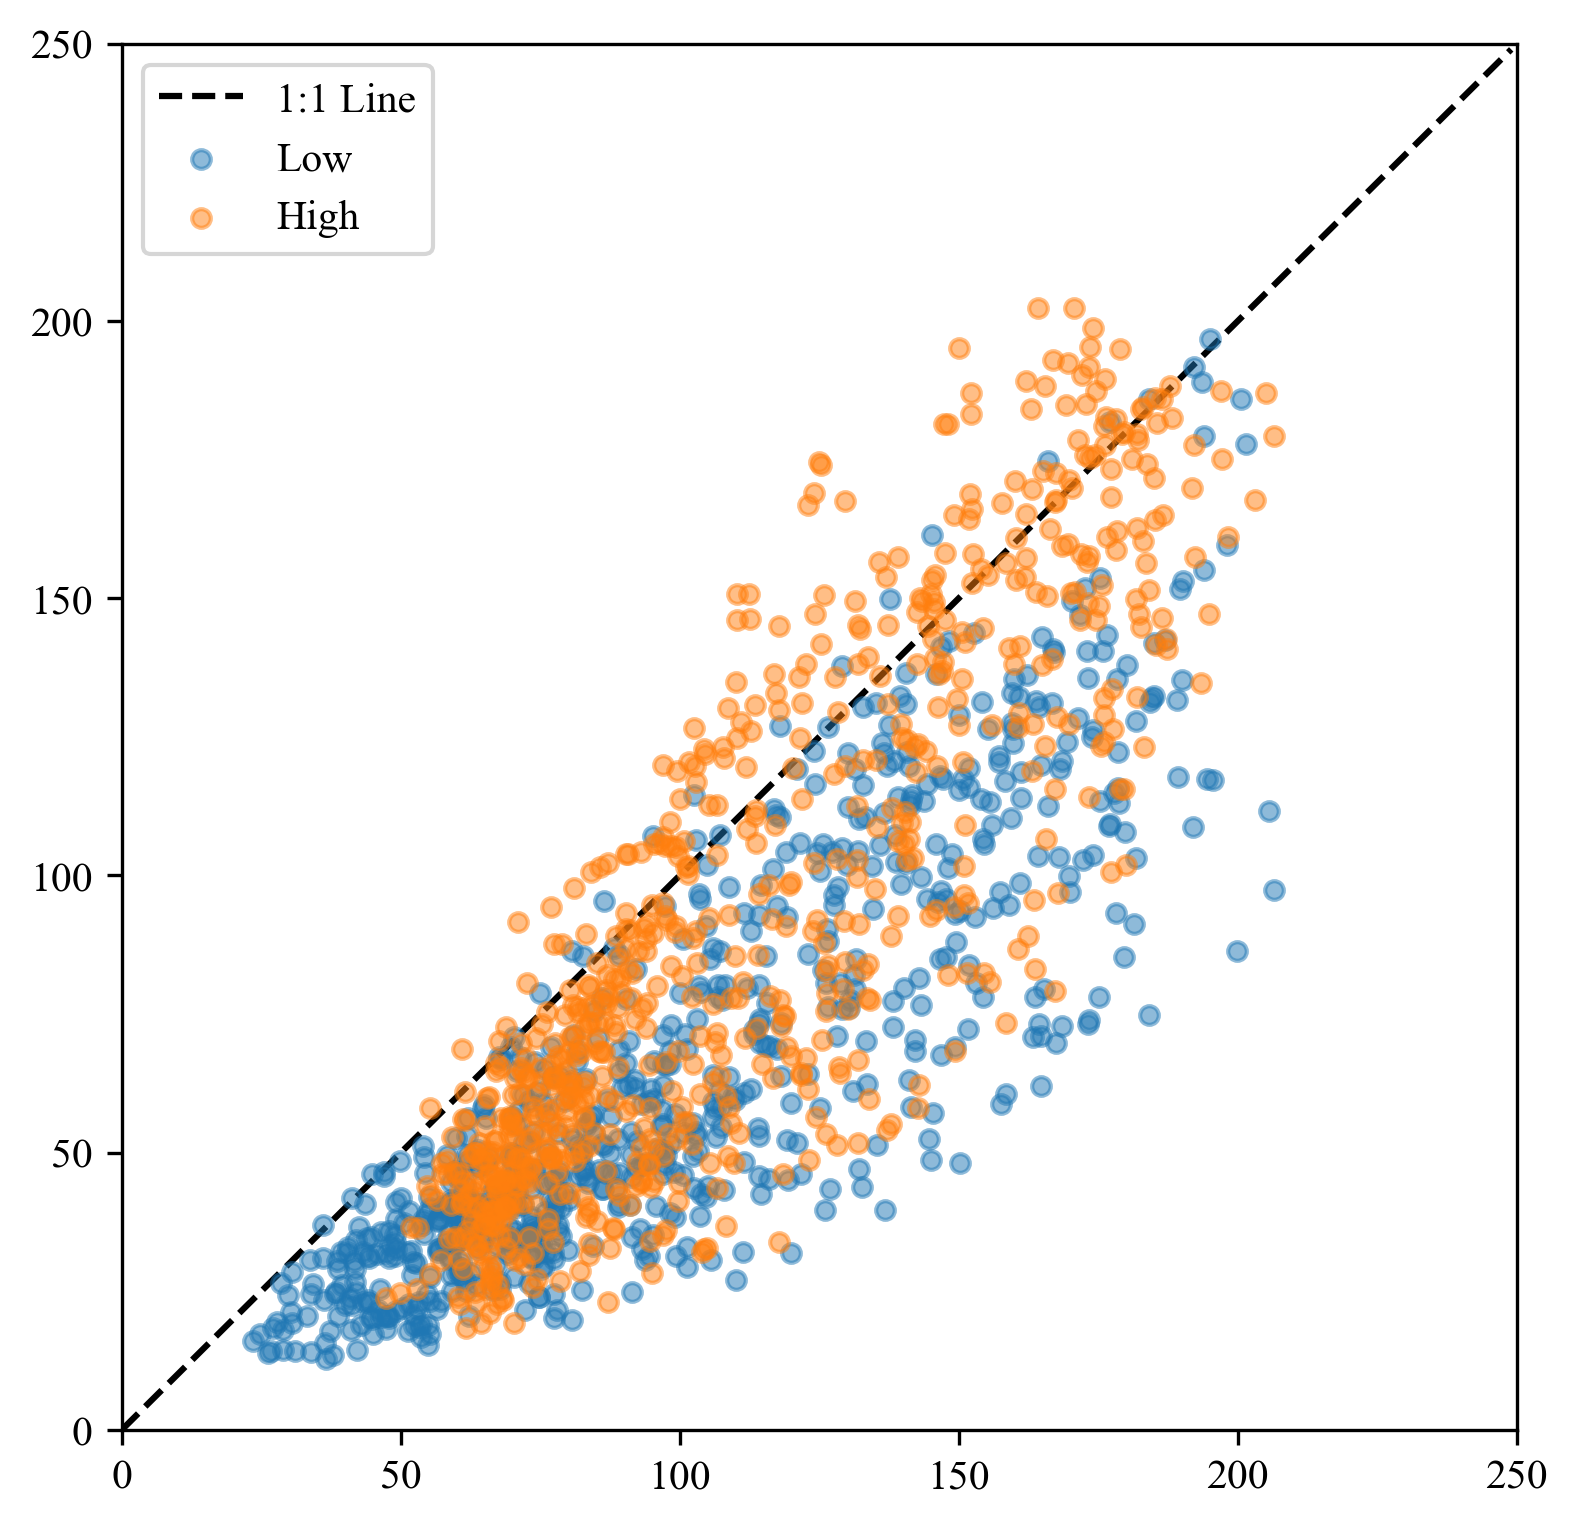

In [68]:
fig = plt.figure(figsize=(6, 6),dpi=300)
ax = fig.add_subplot(111)
ax.plot(np.arange(0,250),np.arange(0,250),'k--',zorder=0,label='1:1 Line')
ax.scatter(df_sim_low, df_obs_low, s=20, marker='o',label='Low',alpha=0.5)
ax.scatter(df_sim_high, df_obs_high, s=20, marker='o',label='High',alpha=0.5)
# ax.scatter(df_sen_high, df_obs_high, s=10, marker='o')
ax.set_xlim(0,250)
ax.set_ylim(0,250)
ax.legend()
plt.show()

In [47]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df_sim_low,df_obs_low)

print("斜率：", slope)
print("截距：", intercept)
print("相关系数：", r_value)
print("p 值：", p_value)
print("标准误差：", std_err)

斜率： 0.7354821776955531
截距： -7.947762204271498
相关系数： 0.8528244354733259
p 值： 8.87490968355933e-205
标准误差： 0.016806809818559375


In [80]:
slope2, intercept2, r_value, p_value, std_err = stats.linregress(df_sim_high,df_obs_high)

print("斜率：", slope2)
print("截距：", intercept2)
print("相关系数：", r_value)
print("p 值：", p_value)
print("标准误差：", std_err)

斜率： 1.0149103371281305
截距： -22.125870924291576
相关系数： 0.8509679241316619
p 值： 5.587493286045522e-203
标准误差： 0.023377151170536507


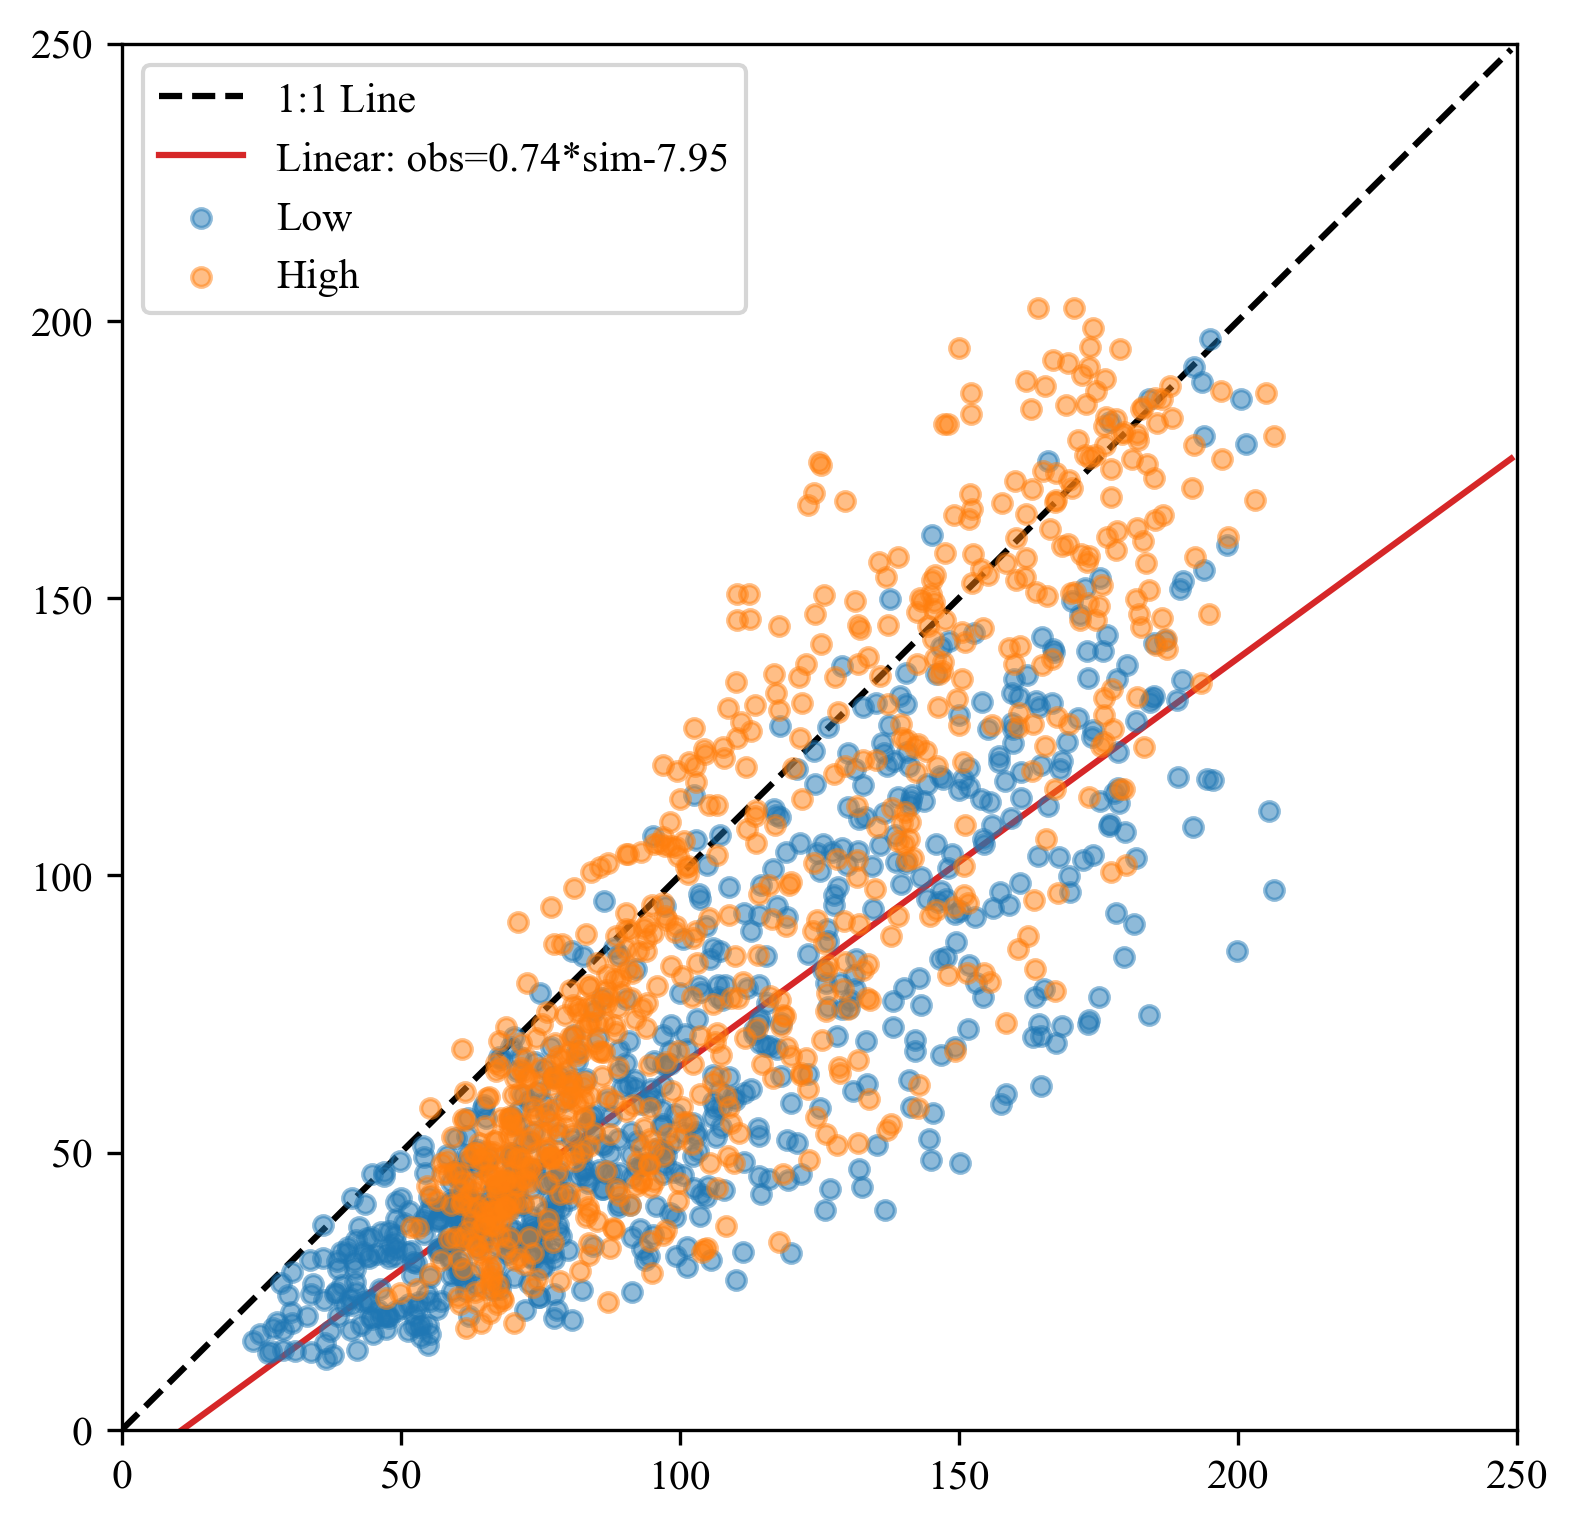

In [78]:
fig = plt.figure(figsize=(6, 6),dpi=300)
ax = fig.add_subplot(111)
ax.plot(np.arange(0,250),np.arange(0,250),'k--',zorder=0,label='1:1 Line')
ax.plot(np.arange(0,250),slope*np.arange(0,250)+intercept,color='tab:red',zorder=0,label=f'Linear: obs={slope:.2f}*sim{intercept:.2f}')
ax.scatter(df_sim_low, df_obs_low, s=20, marker='o',label='Low',alpha=0.5)
ax.scatter(df_sim_high, df_obs_high, s=20, marker='o',label='High',alpha=0.5)
ax.set_xlim(0,250)
ax.set_ylim(0,250)
ax.legend()
plt.show()

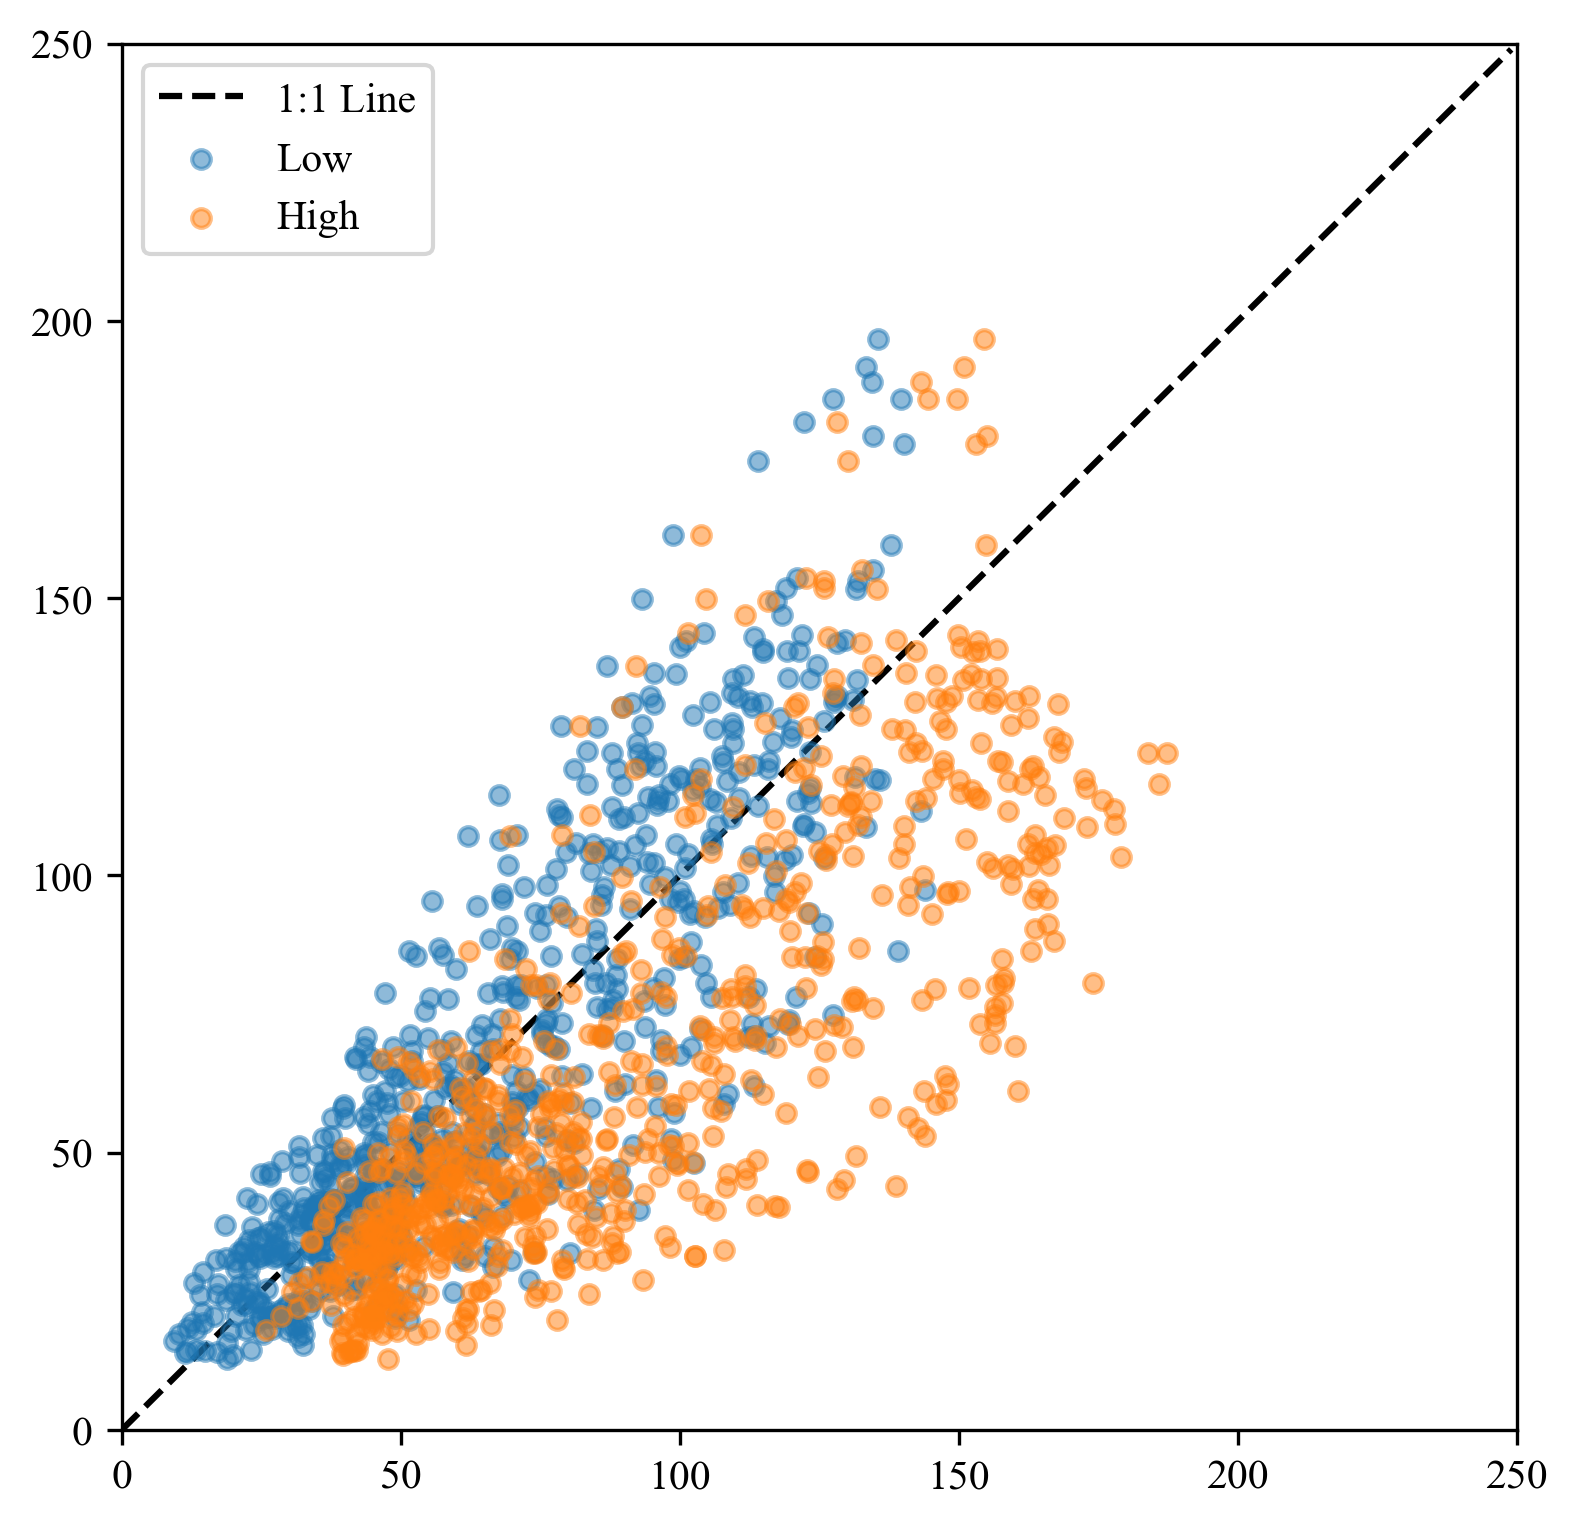

In [81]:
fig = plt.figure(figsize=(6, 6),dpi=300)
ax = fig.add_subplot(111)
ax.plot(np.arange(0,250),np.arange(0,250),'k--',zorder=0,label='1:1 Line')
ax.scatter(slope*df_sim_low+intercept, df_obs_low, s=20, marker='o',label='Low',alpha=0.5)
ax.scatter(slope2*df_sim_high+intercept2, df_obs_low, s=20, marker='o',label='High',alpha=0.5)
ax.set_xlim(0,250)
ax.set_ylim(0,250)
ax.legend()
plt.show()

In [35]:
df_mda8 = df.rolling(8).mean().resample('D').max()
df_after_linregress = df_mda8.copy()
for year in [2014,2015,2016,2019,2021,2022]:
    df_after_linregress[f'sim_{year}'] = slope * df_after_linregress[f'sim_{year}'] + intercept
    df_after_linregress[f'sim_{year}'] = slope * df_after_linregress[f'sim_{year}'] + intercept
    if year >= 2019:
        df_after_linregress[f'sen_{year}'] = slope * df_after_linregress[f'sen_{year}'] + intercept

In [36]:
df_mean = df_after_linregress.mean(axis=0)
obs_low_list  = ['obs_2014','obs_2015','obs_2016']
obs_high_list = ['obs_2019','obs_2021','obs_2022']
sim_low_list  = ['sim_2014','sim_2015','sim_2016']
sim_high_list = ['sim_2019','sim_2021','sim_2022']
sen_high_list = ['sen_2019','sen_2021','sen_2022']

obs_low  = df_mean[obs_low_list].mean()
obs_high = df_mean[obs_high_list].mean()
sim_low  = df_mean[sim_low_list].mean()
sim_high = df_mean[sim_high_list].mean()
sen_high = df_mean[sen_high_list].mean()

print('obs_low  = ',obs_low,
      '\nobs_high = ',obs_high,
      '\nsim_low  = ',sim_low,
      '\nsim_high = ',sim_high,
      '\nsen_high = ',sen_high)

delta_obs           = obs_high - obs_low
delta_low_with_sen  = sen_high - sim_low
delta_high_with_sen = sim_high - sen_high

print('ΔMET + ΔEMIS = {:.2f}'.format(delta_obs),
      '\nΔMET = {:.2f}'.format(delta_low_with_sen),', {:.2f}%'.format(delta_low_with_sen/delta_obs*100),
      '\nΔEMIS = {:.2f}'.format(delta_high_with_sen),', {:.2f}%'.format(delta_high_with_sen/delta_obs*100))

obs_low  =  110.5688346859074 
obs_high =  146.9734766306779 
sim_low  =  68.9946317769461 
sim_high =  72.35688131145146 
sen_high =  113.41150273800925
ΔMET + ΔEMIS = 36.40 
ΔMET = 44.42 , 122.01% 
ΔEMIS = -41.05 , -112.77%


结果还是不好，尝试仅对平均后结果应用回归方程计算

In [55]:
new_sim_low=slope*sim_low+intercept
new_sim_high=slope*sim_high+intercept
new_sen_high=slope*sen_high+intercept

print('obs_low  = ',obs_low,
      '\nobs_high = ',obs_high,
      '\nsim_low  = ',new_sim_low,
      '\nsim_high = ',new_sim_high,
      '\nsen_high = ',new_sen_high)

delta_obs           = obs_high - obs_low
delta_low_with_sen  = new_sen_high - new_sim_low
delta_high_with_sen = new_sim_high - new_sen_high

print('ΔMET + ΔEMIS = {:.2f}'.format(delta_obs),
      '\nΔMET = {:.2f}'.format(delta_low_with_sen),', {:.2f}%'.format(delta_low_with_sen/delta_obs*100),
      '\nΔEMIS = {:.2f}'.format(delta_high_with_sen),', {:.2f}%'.format(delta_high_with_sen/delta_obs*100))

obs_low  =  110.5688346859074 
obs_high =  146.9734766306779 
sim_low  =  104.61489933351895 
sim_high =  109.18638948850833 
sen_high =  113.41150273800922
ΔMET + ΔEMIS = 36.40 
ΔMET = 8.80 , 24.16% 
ΔEMIS = -4.23 , -11.61%


结果还是不好，下面要尝试：
1. 不能用low的线性方程应用到high上，而是应该分别计算后分别应用再尝试
2. 可以尝试用low的2014的线性方程应用到2015和2016上，high同理